<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Ivan Andres Arellano Ruelas, Jesus Ivan Lafarga Lizarraga

**Fecha:** 13 de octubre del 2021.

**Expediente** : IF708989, IF714383.
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/IvanArellanoRuelas/ProyectoModulo1_ArellanoI_LafargaI

# Proyecto TEMA-2

# Contenido:

1. **Indroducción:** 
    * 1.1 Predicción de nivel de tarjeta de crédito 
    * 1.2 Objetivos
    * 1.3 Definicón del problema 
    * 1.4 Nodos
    * 1.5 Hipotesis y supuestos 
    * 1.6 obtención de bases de datos 

## **1. Introducción:**



### 1.1 Predicción de nivel de tarjeta de crédito
> En base a la información financiera de miles de personas, se determinará que nivel de tarjeta debe recibir esa persona, haciendo que cada una tenga el servicio que espera de una tarjeta de crédito. Esto es de gran utilidad ya que ayuda mucho a la relación que tiene el cliente con el banco, lo que se podría reflejar en que el usuario se mantenga como usuario muchos años, si se le asigna la tarjeta de crédito correcta 

### 1.2 Objetivos: 

> **Objetivo general:**
 * Obtener el nivel correctro de asignación de tarjeta de crédito de un cliente en base a su información financiera 
> **Objetivos especificos**
 * Simular de manera optima nuestros nodos y hacer una comparación contra un grupo de control de 1,000 usuarios reales 
 * Determinar las distribucciones de nuestros nodos para ver cual es la cantidad de ingreso con la que cuentan los usuarios de este banco
 * Con base en la edad y nivel de estudios, analizamos el numero de meses que un cliente tienen de relación con el banco
 * Analizar el uso que el cliente da su crédito asignado, en base en el número de compras mensuales, su rango de sueldo, su educación y sus años con el banco 

### 1.3 Definición del problema.


> Es de suma importancia conocer el comportamiento que tienen los clientes de un banco sobre la comodidad de sus tarjetas de crédito, para brindar un mejor servicio al cliente se generará una simulación para llevar un control más cercano a la comodidad del cliente en relación a la tarjeta y el crédito correcto a cada cliente en base a su información. 

> Para cada usuario en base a los de datos de información registrados por medio de simulaciones se le da un nivel correcto de rango y un crédito adecuado, teniendo en cuenta que el banco requiere que el promedio de uso de crédito de cada tarjeta ronde el 50%

### 1.4 Nodos 
1. Brindar crédito correcto a cada cliente. 
2. En base al crédito que se le proporciono uso realizado del cliente a su tarjeta de crédito.
3. Número de ingreso anual con el que cuentan los usuarios del banco.
4. Analizar cuantos productos adicionales contratará el usuario en el banco(objetivo +2). 


### 1.5 Hipotesis y supuestos 
> Existe una fuerte correlación entre varias variables, que nos permitirá llegar al objetivo de manera optima.
Un ejemplo de esto es la correlación que vemos entre las variables de rango de salario, su nivel de estudios y si tiene o no dependientes. 

> El número de transacciones de una persona esta relacionada con su edad y su nivel de educación.

> Los usuarios de mayor edad presentan en promedio mayores ingresos que los usuarios jovenes adultos.

> A menor crédito mayor uso de la cantidad total del mismo, créditos pequeños usaran un porcentaje mayor del capital otorgado a los de créditos de grandes cantidades.

> El ingreso del usuario esta correlacionado a los dependientes con los que cuenta.


### 1.6 obtención de bases de datos 
> La base de datos se obtuvo de la plataforma kaggle la cual tiene bases de datos de libre acceso, contamos con más de 10,000 usuarios de tarjetas de crédito, de un banco en la cual los usuarios pueden descargar la información para el manejo de datos. 
Conocemos que el banco ha tenido problemas por medio de la descripción que proporciona la página, debido a que el banco no ha podido definir a que clientes darle una mejor atención, por lo cual es vital hacer un análisis para saber que categoría de servicio( Tarjeta de crédito) debe recibir cada usuario .

> Credit Card customers. (2020, 19 noviembre). Kaggle. https://www.kaggle.com/sakshigoyal7/credit-card-customers

# 1.7 Visualización de resultados de simulación.
![image.png](attachment:image.png)

## 1.6  Obtención de bases de datos

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric.kernel_density import KDEMultivariate
import scipy.stats as st
import statsmodels.api as sm 
from sklearn.model_selection import GridSearchCV
import warnings 
warnings.filterwarnings("ignore")
db = pd.read_csv('BankChurners.csv',skiprows=2)
db.head(10)

# Funciones en el código: 


In [ ]:
# Funciones que se van a usar en el siguiente proyecto

def kde_sklearn(x, x_grid, bandwidth, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf)


def generador_var(proba_acum: 'Probabilidad acumulada', indices: 'Valores por generar', N: 'Aleatorios por generar'):
    diccionario = {i: idx for i, idx in enumerate(indices)}
    U = np.random.rand(N)
    y = pd.Series([sum([1 for p in proba_acum if p < ui]) for ui in U]).map(diccionario)
    return y


def kde_sklearn_mod(x, bandwidth, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    pdf = lambda x_grid: np.exp(kde_skl.score_samples(x_grid[:, np.newaxis])) if isinstance(x_grid, np.ndarray) else \
        np.exp(kde_skl.score_samples(np.array[x_grid])[:, np.newaxis])
    return pdf


def muestreo_est(B: 'Número de estratos'):
    u= np.random.uniform(B) 
    i=np.arange(0,B) 
    v = (u+i)/B 
    return v 
   
def prueba_dist(nodo: "Nodo", bins: 'bins'):
    '''
    Nos devuelve distribuciones continuas (15) , para poder observar cual se adapta mejor a nuestro nodo
    '''
    d_continuas = [d for d in dir(st) if isinstance(getattr(st, d), getattr(st, "rv_continuous"))]

    y, x, _ = plt.hist(nodo, bins=bins, density=True)
    x = x[1:]

    error = pd.DataFrame(columns = ["distribución", "error"])
    i = 0

    for d in d_continuas[1:101]:
        try:
            params = getattr(st, d).fit(nodo)
            y_hat = getattr(st, d)(*params).pdf(x)
            error.loc[i, :] = [d, np.mean(np.abs((y - y_hat)/y))] #Error MAPE
            plt.plot(x, y_hat, label = d)
            i += 1
        except:
            pass
    plt.legend()
    plt.show()

    error.set_index("distribución", inplace=True)
    print(error.sort_values("error"))   
    

# Función que hace la prueba Q_Q y nos muestra la gráfica.    
def q_q(nodo: "Nodo a simular", distr:"Distribución a comparar"):
    '''
    Esta función te arroja como se acomoda la distribución elegida (como entrada),
    del nodo introducido.
    '''
    # Histograma de las variables creadas
    divisiones = 50 # Cantidad de barras en el histograma
    fig, ax = plt.subplots(2,1, figsize=(8,10))
    fig.tight_layout(pad=3.0)

    y, x, _ = ax[0].hist(nodo, divisiones, density=True, label='Histograma mediciones')
    # Función de distribución de probabilidad la cual creemos que mis datos distribuyen 
    dist = distr
    params = getattr(st, dist).fit(nodo)
    # RECORDAR: SÓLO FUNCIONA PARA DISTRIBUCIONES CONTINUAS
    # Graficar PDF de la distribución que queremos probar

    # x = np.arange(measurements.min(), measurements.max(), .01)
    
    y_hat = getattr(st, dist).pdf(x, *params)
    ax[0].plot(x, y_hat,'r--', label='Distribución ajustada')
    ax[0].set_ylabel('Probability')
    ax[0].grid()

    grap1 = sm.qqplot(nodo, dist=getattr(st, dist), line='q', fit=True, ax=ax[1])
    ax[1].grid()
    ax[1].set_title('Usando paquete stats') 
    
def complementarios_1(N):
    a = np.random.rand(int(N/2))
    b = 1-a
    return np.concatenate((a,b))
    


# Histogramas:

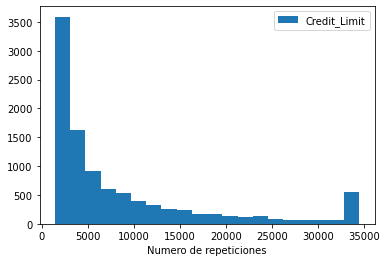

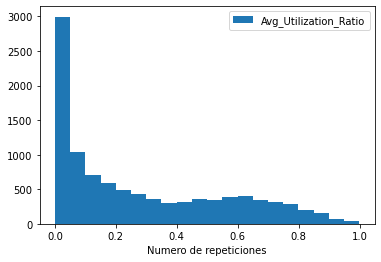

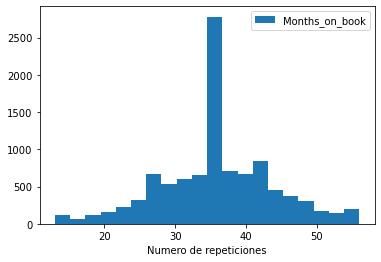

In [6]:
nodos = ['Credit_Limit','Avg_Utilization_Ratio','Months_on_book']
for i in range(3):
    plt.hist(db[nodos[i]], bins=20, label= nodos[i])
    plt.legend()
    plt.xlabel('Numero de repeticiones')
    plt.show()
    

Histograma cuarto nodo: 

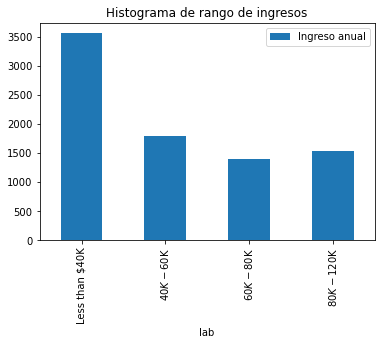

In [7]:
a = sum(db['Income_Category']=='Unknown')
b = sum(db['Income_Category']=='Less than $40K')
c = sum(db['Income_Category']=='$40K - $60K')
d = sum(db['Income_Category']=='$60K - $80K')
e = sum(db['Income_Category']=='$80K - $120K')
df = pd.DataFrame({'lab':['Less than $40K', '$40K - $60K' ,'$60K - $80K','$80K - $120K' ], 
                   'val':[b, c, d, e]})

df.plot.bar(x='lab', y='val',align='center',label = 'Ingreso anual')
plt.title('Histograma de rango de ingresos')
plt.show();

- A partir de este código decidimos separar los datos por cada nodo para que sean analizados y trabajados de una manera individual.

# Nodo 1 Limite de crédito: 
 
Podemos observar cual es el limite de crédito con el que es asignado cada uno de los clientes   

In [8]:
N_1 = np.array(db.Credit_Limit)

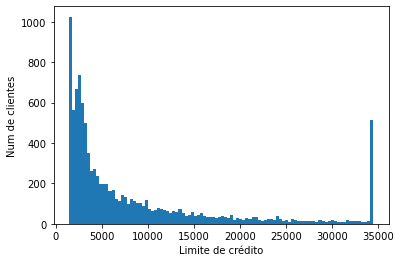

In [9]:
plt.hist(N_1,bins=100)
plt.xlabel('Limite de crédito')
plt.ylabel('Num de clientes')
plt.show()

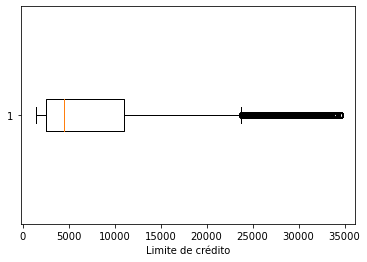

In [10]:
# Grafica de Caja y bigotes de limite de Crédito
plt.boxplot(N_1, vert=False)
plt.xlabel('Limite de crédito');

### Primeros Insights: 
* Media 
* Max
* Min 


In [11]:
print('Tenemos una media de: ', round(N_1.mean()),'$')
print('El maximo crédito aprobado es de : ', N_1.max(),'$')
print('El minimo crédito aprobado es de : ', N_1.min(),'$')

Tenemos una media de:  8632 $
El maximo crédito aprobado es de :  34516.0 $
El minimo crédito aprobado es de :  1438.3 $


In [12]:
db_s = db.sample(n = 5000)
N_1s = np.array(db_s.Credit_Limit)


In [ ]:
prueba_dist(N_1s,50)

In [14]:
for i in range(70,80):
    try: q_q(N_1, a[i]) 
    except ValueError: 
            pass

TypeError: 'int' object is not subscriptable

In [ ]:
grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(2, 100, 30)},
                    cv=20) # 20-fold cross-validation
grid.fit(N_1s[:, None])
print(grid.best_params_)

In [ ]:
fig, ax = plt.subplots()
for bandwidth in [2,10,20,  15.517241379310345,25.655172413793103]:
    ax.plot(np.linspace(0,35000,15), kde_sklearn(N_1, np.linspace(0,35000,15), bandwidth=bandwidth),
            label='bw={0}'.format(bandwidth), linewidth=3, alpha=0.7)
ax.hist(N_1s, 15, fc='gray', histtype='stepfilled', alpha=0.3, density=True)
ax.legend(loc='upper left')

# Reducción de varianza y Montecarlo  

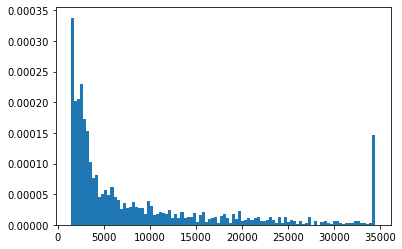

media mu =nan, desviación estándar muestral =nan
8631.953698034955 9088.327899308213


In [108]:
N=10000
f_1=kde_sklearn_mod(N_1s,  25.655172413793103)
proba = f_1(np.arange(0,35000,.5))
f_acum = proba.cumsum()
# Reducción de varianza y Montecarlo


u = muestreo_est(N)
funcion2 = lambda u: (generador_var(f_acum, N_1s, N))
o=funcion2(u).values
# Reducción con método estratificado

complements=complementarios_1(N)
funcion2_1 = lambda u: (generador_var(f_acum, N_1s, N))
o_2=funcion2(u).values
# Reducción por complementario

J = 100 
# Cantidad de particiones del histograma
    
    
y, x, _ = plt.hist(o, J, density=True)
plt.show()
x = x[:-1] # Se obvia el último valor de x para obtener exactamente J muestras de x



mu = np.mean(o)
sigma = np.std(o)
print('media mu =%f, desviación estándar muestral =%f'%(mu,sigma))
print(N_1.mean(), N_1.std())
# Media y desviación estándar muestral

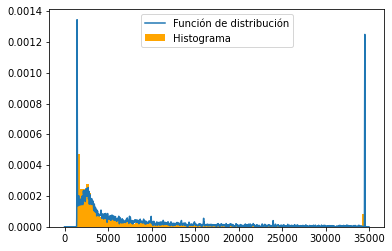

In [84]:
plt.hist(o, bins=100, density = True, color = 'orange',label='Histograma')
plt.plot(np.arange(0,35000,10),f_1(np.arange(0,35000,10)),label='Función de distribución')

plt.legend()

plt.show()

In [85]:
o_2.mean(),o.mean(), N_1.mean()

(6595.51719, 6587.269690000001, 8631.953698034955)

In [90]:
# Media simulando en 83 prueba de hipótesis

media = N_1.mean()
sd = N_1.std()
N = len(N_1)

# Nivel de confianza
confianza = 0.95
X = N_1

# Hipótesis nula
media2 = 8631
ho = st.ttest_1samp(X, media2)# Realizamos la prueba de hipótesis para H0= mu=media2
print('La prueba de hipótesis arroja como resultado\n',ho)
t = (np.mean(X) - media2)/(np.std(X) / np.sqrt(N))# Calculamos el estadístico normalizado
print('Cálculo del estadístico de prueba teórico=', t)
confianza_ph = 0.05# Cálculo de la región de rechazo
cuantil = st.t(N-1).cdf(1-confianza_ph/2)
print(f'Región de rechazo = (t<{-cuantil}) U (t>{cuantil})')

La prueba de hipótesis arroja como resultado
 Ttest_1sampResult(statistic=0.010559560959662642, pvalue=0.9915750539360884)
Cálculo del estadístico de prueba teórico= 0.010560082355093632
Región de rechazo = (t<-0.8352082246194401) U (t>0.8352082246194401)


In [93]:
# Nivel de confianza, y su intérvalo.
# Parámetros de los datos reales
confianza = .95
media = N_1.mean()
sd = N_1.std()

# Intervalo de confianza usando t-student
i1 = st.t.interval(confianza, len(N_1)-1, loc=np.mean(N_1), scale=st.sem(N_1))

print('Con una confianza de %2.2f la media estará en el intervalo t,\n %s' %(confianza,i1))
print('Media calculada' ,o.mean())
np.mean(N_1)

Con una confianza de 0.95 la media estará en el intervalo t,
 (8454.916294502338, 8808.991101567572)
Media calculada 6587.269690000001


8631.953698034955

# Nodo 2 Porcentaje de uso de crédito:


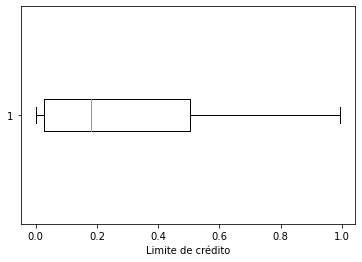

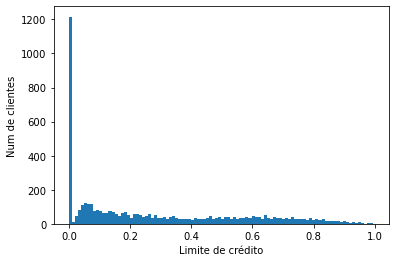

In [291]:
N_2 = db_s['Avg_Utilization_Ratio'] # Grafica Caja y bigotes 
plt.boxplot(N_2, vert=False)
plt.xlabel('Limite de crédito')
plt.show();

# Grafico de Barras 

plt.hist(N_2,bins=100)
plt.xlabel('Limite de crédito')
plt.ylabel('Num de clientes')
plt.show();

In [292]:
# Calculo de la media 
print('Tenemos una media de: ', N_2.mean()*100,'%')
# Calculo del maximo crédito utilizado 
print('El maximo crédito utilizado es de : ', N_2.max()*100,'%')
# Calculo del minimo crédito utilizado 
print('El minimo crédito utilizado es de : ', N_2.min()*100,'%')

Tenemos una media de:  27.622599999999984 %
El maximo crédito utilizado es de :  99.5 %
El minimo crédito utilizado es de :  0.0 %


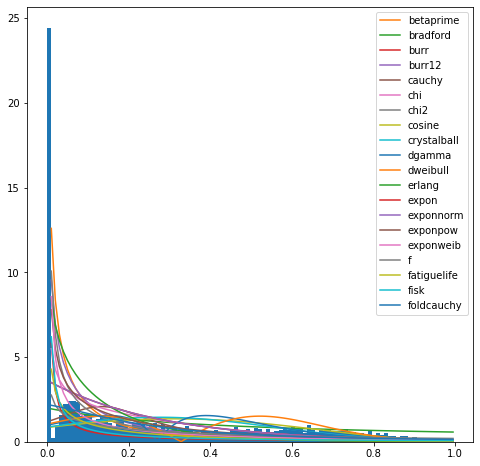

                 error
distribución          
cosine        0.502338
foldcauchy    0.512409
dweibull      0.531603
crystalball    0.54523
cauchy        0.578268
dgamma        0.587908
f             0.619382
exponnorm     0.675613
expon         0.675803
chi            0.67882
exponpow      0.688275
exponweib     0.740958
fatiguelife   0.751308
chi2             0.788
fisk          0.833385
burr12        0.840595
burr          0.852613
erlang           1.007
betaprime      1.02047
bradford        1.1321


In [293]:
# Grafica de barras con las distribuciones 
plt.figure(figsize=(8,8))
prueba_dist(N_2,100)

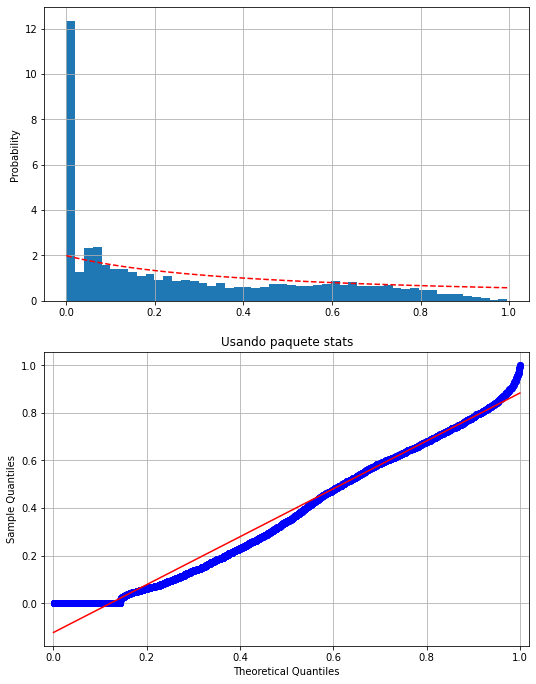

In [294]:
# Quantiles
q_q(N_2, 'bradford')

In [295]:
N_2 = N_2*100

In [296]:
grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(2, 100, 30)},
                    cv=20) 
# 20-fold cross-validation
grid.fit(N_2[:, None])
print(grid.best_params_)

{'bandwidth': 2.0}


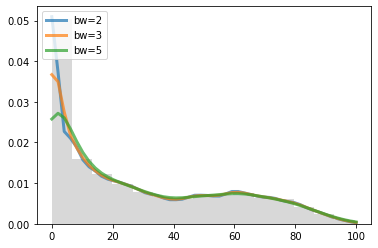

In [297]:
fig, ax = plt.subplots()
for bandwidth in [2,3,5]:
    ax.plot(np.linspace(0,100,50), kde_sklearn(N_2, np.linspace(0,100,50), bandwidth=bandwidth),
            label='bw={0}'.format(bandwidth), linewidth=3, alpha=0.7)
ax.hist(N_2, 15, fc='gray', histtype='stepfilled', alpha=0.3, density=True)
ax.legend(loc='upper left')

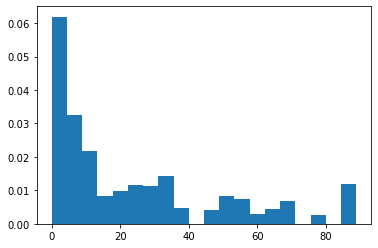

media mu =23.589410, desviación estándar muestral =25.806148
27.62260000000006 27.575160473423225


In [298]:
# Reducción de varianza y Montecarlo
N=10000
f_1=kde_sklearn_mod(N_2,2)
proba = f_1(np.arange(0,100,.4))
f_acum = proba.cumsum()
# Reducción con método estratificado
u = muestreo_est(N)
funcion2 = lambda u: (generador_var(f_acum, N_2, N))
o=funcion2(u).values

# Reducción por complementarios
complements=complementarios_1(N)
funcion2_1 = lambda u: (generador_var(f_acum, N_2, N))
o_2=funcion2(u).values

# Cantidad de particiones del histograma
J = 20  
y, x, _ = plt.hist(o, J, density=True)

plt.show()

# Se obvia el último valor de x para obtener exactamente J muestras de x
x = x[:-1] 

# Media y desviación estándar muestral
mu = np.mean(o)
sigma = np.std(o)
print('media mu =%f, desviación estándar muestral =%f'%(mu,sigma))
print(N_2.mean(), N_2.std())

In [299]:
o_2.mean(),o.mean(), N_2.mean()

(23.7698, 23.58941, 27.62260000000006)

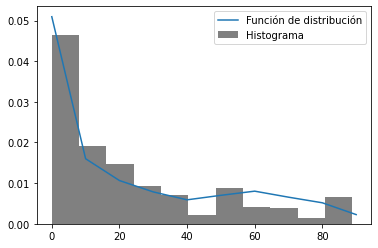

In [300]:
# Comparamos el histograma de "o" (10000 simulaciones del ataque especial, 
#                                                                      en función de su distribución de probabilidad).

plt.hist(o, bins=11, density = True, color = 'gray',label='Histograma')

plt.plot(np.arange(0,100,10),f_1(np.arange(0,100,10)),label='Función de distribución')

plt.legend()

plt.show()


In [301]:
# Prueba chi cuadrada 
dist = "bradford"
pi = getattr(st, dist).pdf(x, *getattr(st, dist).fit(o))

# Cálculo de la esperanza usando la expresión teórica
Ei = x*pi

# Cálculo teórico de la chi cuadrada
x2 = list(map(lambda Ei, obs_i:(obs_i - Ei)**2 / Ei, Ei, y))
x2[2:].sum()
print('Valor de chi cuadrado teorico  = ', x2)

# Cálculo usando la librería estadística de la chi cuadrada
X2 = st.chisquare(y, Ei)
print('Valor de chi cuadrado librería = ', X2)

# Cálculo de Grados de libertad del estadístico
p = len(getattr(st, dist).fit(o)) # Parámetros estimados con los datos
m = J-p-1 # grados de libertad

Chi_est = st.chi2.ppf(q=0.95, df=m)
print('Estadístico de chi_cuadrado = ', Chi_est)
print('Media muestral = ', mu, '\nDesviación estándar muestral = ', sigma)

Valor de chi cuadrado teorico  =  inf
Valor de chi cuadrado librería =  Power_divergenceResult(statistic=inf, pvalue=0.0)
Estadístico de chi_cuadrado =  26.29622760486423
Media muestral =  23.58941 
Desviación estándar muestral =  25.806148392425786


In [340]:
x2 = list(map(lambda Ei, obs_i:(obs_i - Ei)**2 / Ei, Ei, y))
x2 = sum(x2[1:])
print('Valor de chi cuadrado teorico  = ', x2)
X2 = st.chisquare(y, Ei)

print('Valor de chi cuadrado librería = ', X2)

Valor de chi cuadrado teorico  =  4.263133792820557
Valor de chi cuadrado librería =  Power_divergenceResult(statistic=inf, pvalue=0.0)


# Nodo 3 Meses de relacción con el banco 

In [351]:
N_3 = db_s['Months_on_book']

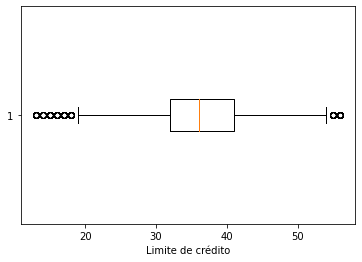

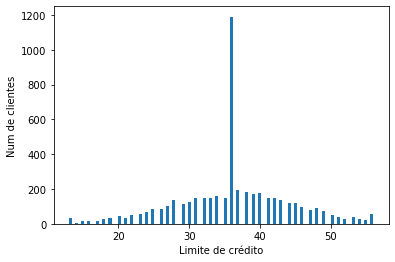

In [352]:
 # Grafica Caja y bigotes 
N_2 = db_s['Avg_Utilization_Ratio']
plt.boxplot(N_3, vert=False)
plt.xlabel('Limite de crédito')

plt.show();

# Grafico de Barras 
plt.hist(N_3,bins=100)
plt.xlabel('Limite de crédito')
plt.ylabel('Num de clientes')

plt.show();

In [353]:
# Calculo de la media 
print('Tenemos una media de: ', N_2.mean()*100,'Meses')
# Calculo del maximo limite de crédito
print('El maximo es de : ', N_2.max()*100,'Meses')
# Calculo del minimo limite de crédito
print('El minimo es de : ', N_2.min()*100,'Meses')

Tenemos una media de:  27.622599999999984 Meses
El maximo es de :  99.5 Meses
El minimo es de :  0.0 Meses


In [357]:
a[1],

'anglit'

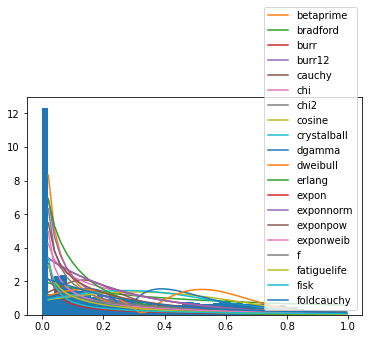

                 error
distribución          
foldcauchy    0.381378
exponpow      0.423526
cosine        0.472526
chi           0.482543
dweibull      0.484438
f             0.494191
crystalball   0.495092
expon         0.497824
exponnorm     0.497891
chi2          0.506495
cauchy        0.513454
burr12          0.5222
exponweib     0.525279
dgamma        0.530562
fatiguelife   0.642414
betaprime      0.65754
fisk          0.692704
erlang        0.707458
burr          0.729047
bradford      0.869064


In [365]:
# grafico de barras con las diferentes distribuciones 
prueba_dist(N_2,50)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

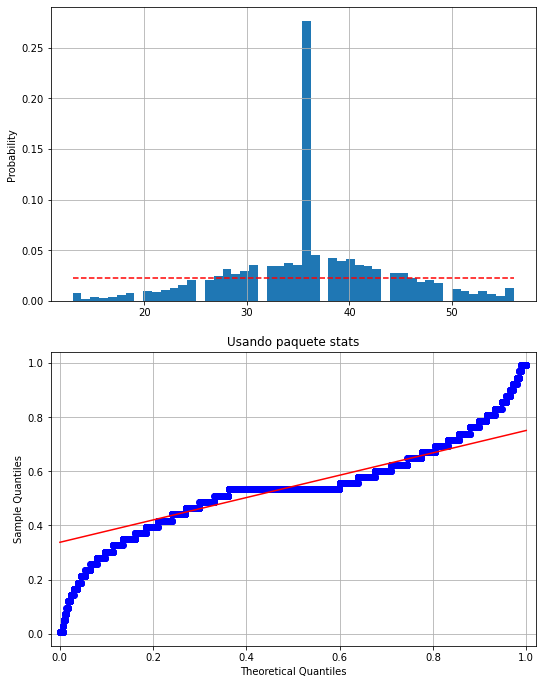

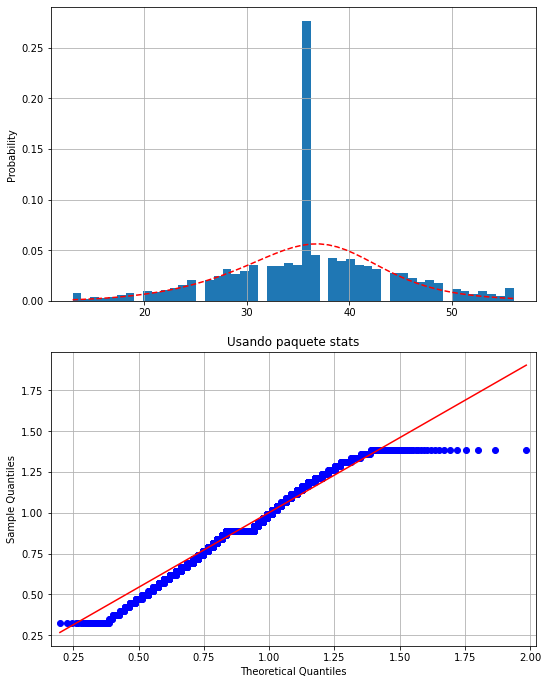

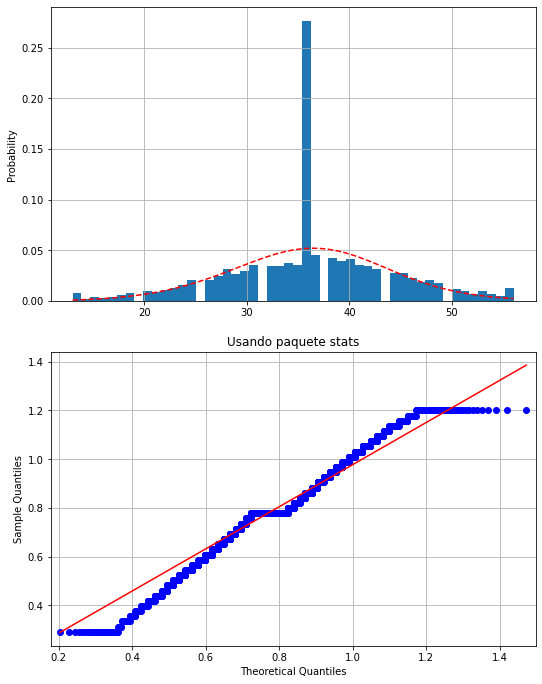

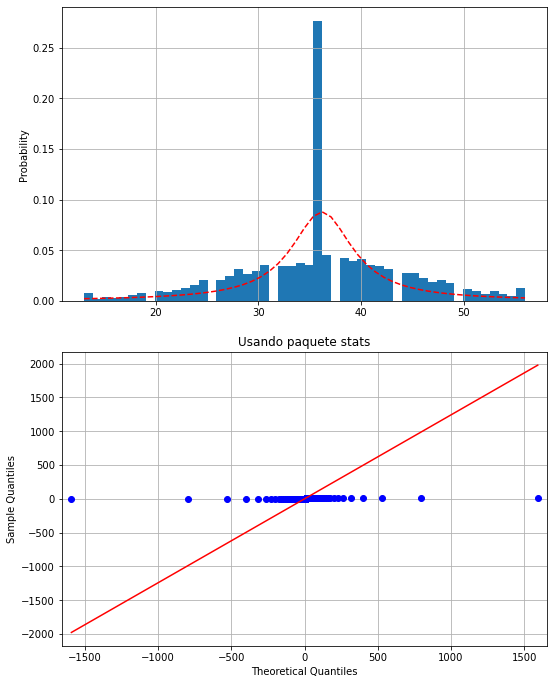

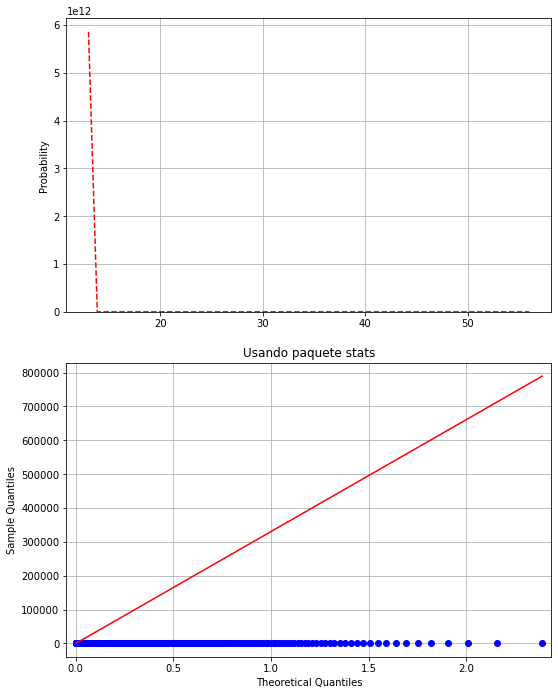

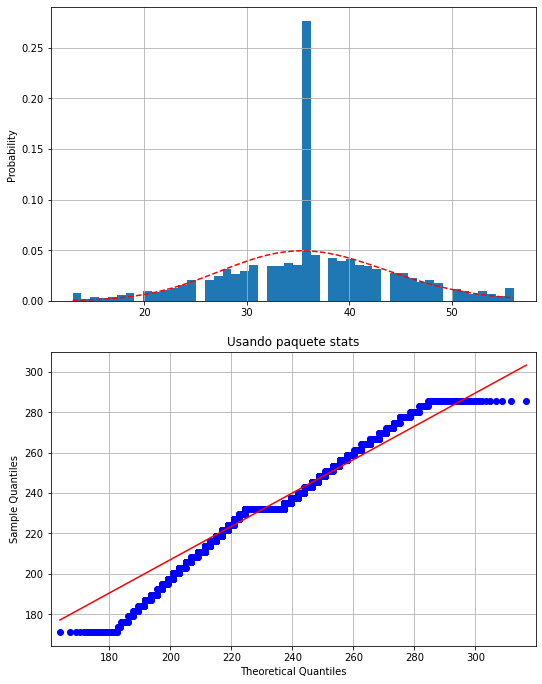

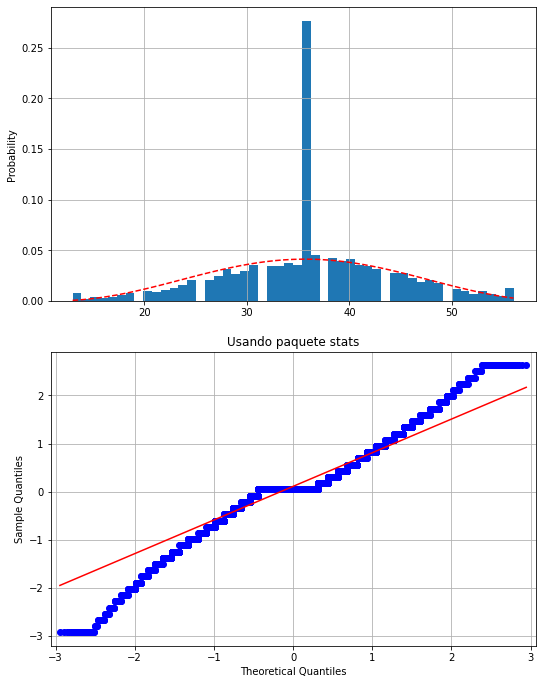

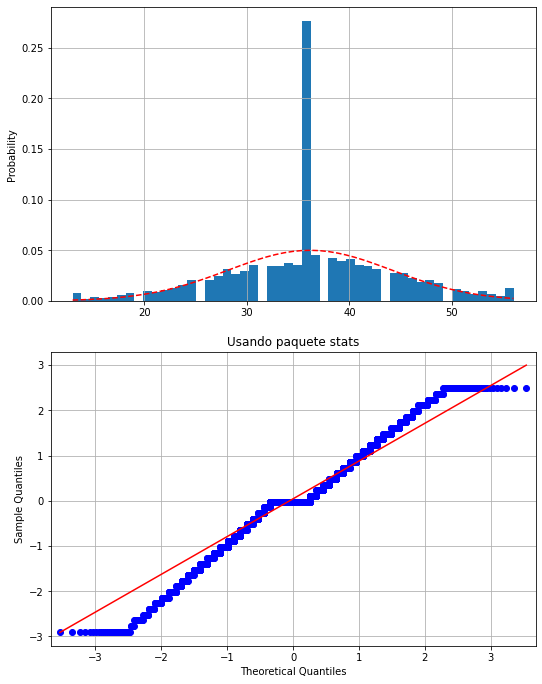

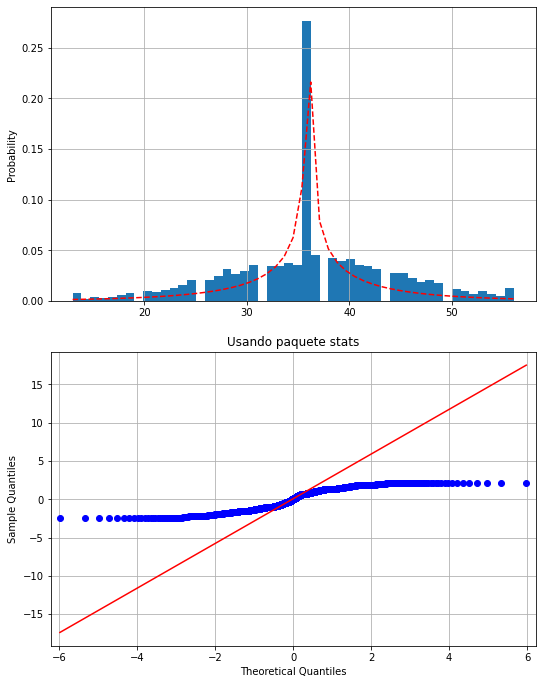

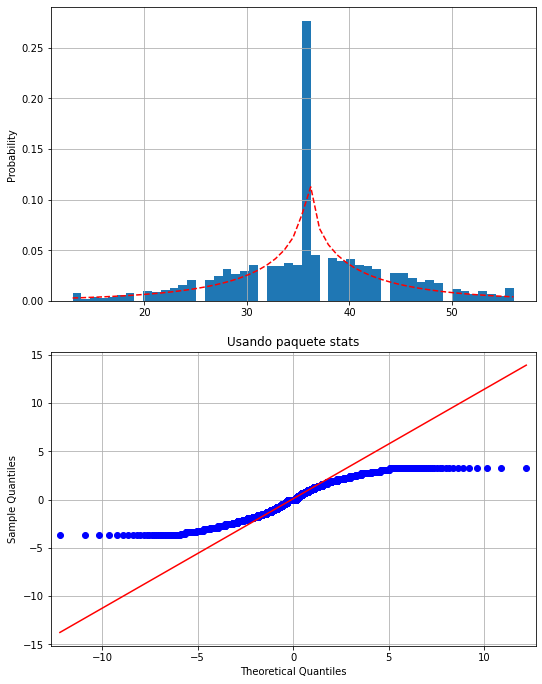

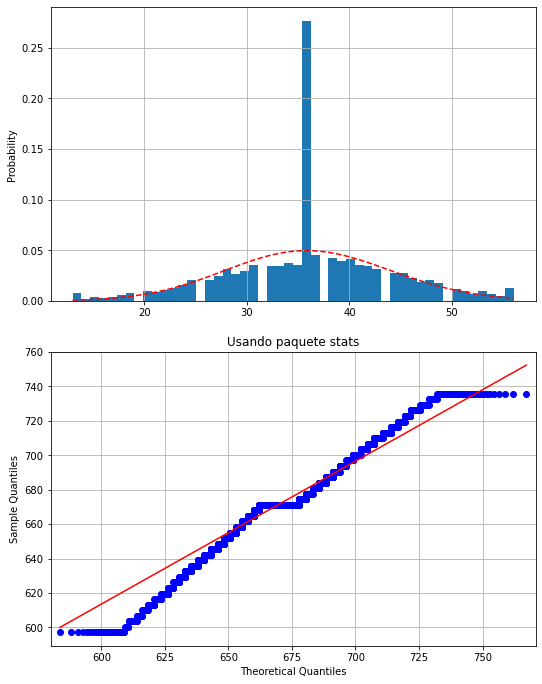

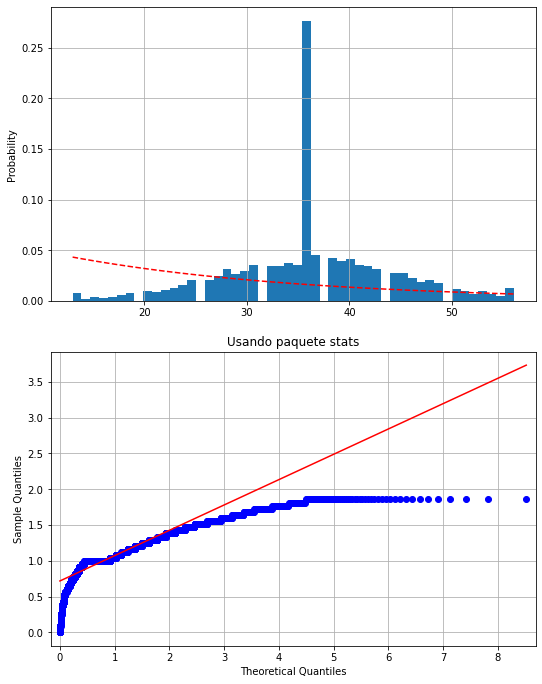

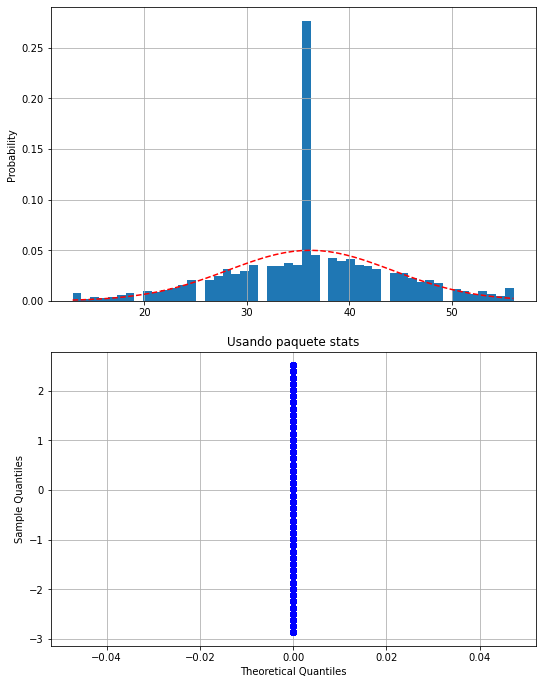

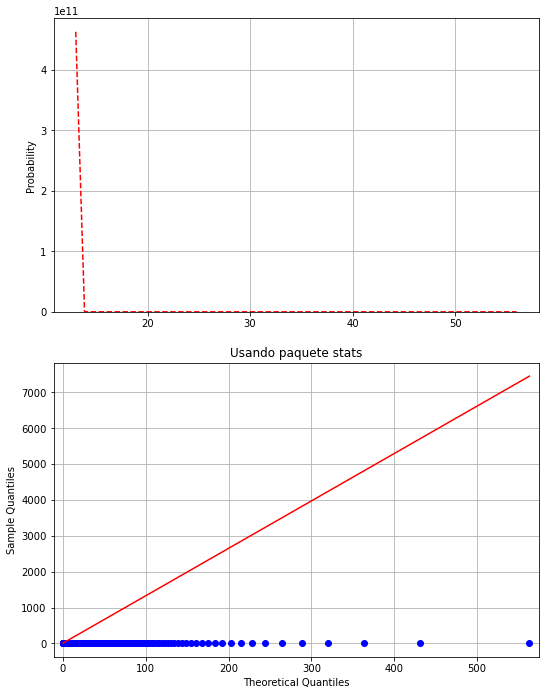

In [364]:
# Quantiles 
[q_q(N_3, a[i]) for i in range(6,20)]

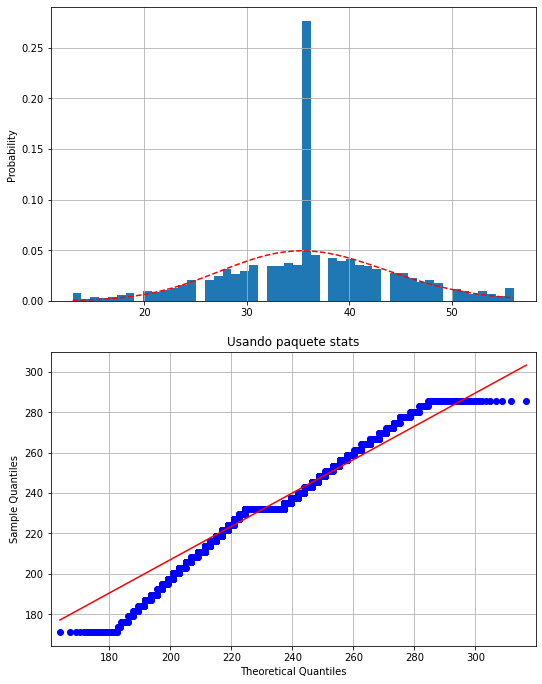

In [368]:
# Sample y Theoretical Quantiles 
# Grafica de barras con Chi^2
q_q(N_3, 'chi2')